# CNOD Protocol Calibration
This file is meant to calibrate a CNOD gate to produce a cat state. In the file, alpha refers to the overall amplitude of the first CNOD, and beta to the amplitude of the second CNOD.
This file can also be used to calibrate a single CNOD by just using the parameters relative to CNOD(a)

## Imports
If not working check the files under analyze -> fit_func. Check that the path directory is correct

Files to check: (exp_decay_sine.py, exp_decay_doubleSine.py, exp_decay_to_zero_sine_withHeating.py, exp_decay_to_zero_sine) 

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian, square
import qutip as qt
from func import *
from System import *
from Visualization import *

import os, sys
p_current = os.getcwd() #当前文件所在的文件夹路径：第一级父路径
p_parent = os.path.abspath(os.path.join(p_current,os.pardir)) # 当前文件所在的文件夹路径的父文件夹路径： 第二级父路径  http://www.moonapi.com/news/1923.html
sys.path.insert(1,p_parent) 
import analyze.fit as fit

### Choose figures' resolution

In [2]:
npts = 200 # number of points in Wigner function plots
max_alpha = 6.0 # alpha max limit in Wigner function plots
dpi = 300 # dpi for saved pictures

### Choose your System Parameters in the System.py file

In [3]:
print("Chosen system parameters:")
print("Kerr:", KERR/2/np.pi, "* 2 * pi")
print("CHI:", CHI/2/np.pi, "* 2 * pi MHz")
print("EPSILON:",EPSILON)

Chosen system parameters:
Kerr: 0.0 * 2 * pi
CHI: 1.0 * 2 * pi MHz
EPSILON: 94


### Calibration Parameters for Conditional NOT Displacement Gate (CNOD)

In [4]:
chi = CHI * 1e-3  # GHz
detuning = -chi/1e6
omega_shift = chi

H = chi * a.dag() * a * proj_e 
# Pulse parameters
is_square = False # Choose between gaussian or square pulse
is_cut_tail_antisym = True # Choose between smooth pulse or cut tail pulse

"Calibration parameters"
CNOD_total_protocol = int(round(292.81,0)) # Total time taken for CNOD protocol [CNOD(a) + CNOD(b)] in ns
CNOD_alpha_time = (CNOD_total_protocol * 3)//4 + 1 # Time taken for CNOD(a) in ns, this is an arbitrary value, can be optimised based on the pulse shape
CNOD_beta_time = CNOD_total_protocol - CNOD_alpha_time # Time taken for CNOD(b) in ns
alpha = 4.0  
disp05amp = (21779713.7523335408 if is_cut_tail_antisym else 117500000) #calibrate for each set of pulse parameters by fixing alpha
alpha_scale = 0.91 # Amplitude scaling for second CNOD
timestep = 1

print("Chi:", chi/2/np.pi, "GHz =", (chi)/2/np.pi*(10**6), "KHz")
print("Detuning:", detuning/2/np.pi*(10**6), "* 2π kHz")
print("Chosen timestep:", timestep)
print("Pulse choice:", "" if is_square else ("Rough" if is_cut_tail_antisym else "Smooth"), "Square" if is_square else "Anti-symmetric Gaussian")

Chi: 0.001 GHz = 1000.0 KHz
Detuning: -0.001 * 2π kHz
Chosen timestep: 1
Pulse choice: Rough Anti-symmetric Gaussian


In [5]:
print("Target Alpha:", alpha)
beta = np.pi/(2*alpha)
print("Target beta:", beta)
print("Total protocol time:", CNOD_total_protocol, "ns")
print(r"CNOD(a) total time:", CNOD_alpha_time, "ns")
print(r"CNOD(b) total time:", CNOD_beta_time, "ns")

Target Alpha: 4.0
Target beta: 0.39269908169872414
Total protocol time: 293 ns
CNOD(a) total time: 220 ns
CNOD(b) total time: 73 ns


### Projectors

In [6]:
proj_e_a = qt.tensor(basis(2,1)*basis(2,1).dag(), destroy(N)) # |e><e| x a
proj_g_a = qt.tensor(basis(2,0)*basis(2,0).dag(), destroy(N)) # |g><g| x a 
Number = tensor(qeye(2), destroy(N).dag()*destroy(N)) # I x a†a

### Loss and Expectation parameters

In [7]:
conv = 1e3 # Unit conversion factor

c_ops = [] # No Loss
# c_ops = calc_loss(np.inf, np.inf, np.inf, np.inf) # No Loss
# c_ops = calc_loss(260*conv, 260*conv, 18*conv, 7*conv)

e_ops = [2 *  proj_e_a, 2 * proj_g_a ] # Expectation values. The 2 factor is for normalisation if starting with superposition state |g> + |e>.

### Choose initial state and which CNOD you would like to use

In [8]:
state_0 = superpos # Initial state as ket

# theta = 0
# state_0 = tensor((fock(2,0) + ((np.exp(-1j*theta)) * fock(2,1))).unit(), fock(N,0))
# state_0 = ket2dm(superpos) # Initial state as density matrix (Slower)

print("isKet:", isket(state_0))

cnod_alpha = CNOD_ket(alpha, disp05amp, state_0, 0, CNOD_alpha_time, timestep, chi, detuning, c_ops, e_ops, is_cut_tail_antisym=is_cut_tail_antisym) # This is just the first CNOD
# cnod_complete = CNOD(alpha*alpha_scale, disp05amp, cnod_alpha, 0, CNOD_beta_time, timestep, chi, detuning, c_ops, e_ops, is_cut_tail_antisym=is_cut_tail_antisym) # This is just the complete protocol (CNOD(a) + CNOD(b))
# cnod_beta = CNOD_ket(alpha*alpha_scale, disp05amp, state_0, 0, CNOD_beta_time, timestep, chi, detuning, c_ops, e_ops, is_cut_tail_antisym=is_cut_tail_antisym) # This is just the first CNOD

cnod = cnod_alpha
gate_time = CNOD_alpha_time

isKet: True
10.0%. Run time:   0.04s. Est. time left: 00:00:00:00
20.0%. Run time:   0.08s. Est. time left: 00:00:00:00
30.0%. Run time:   0.12s. Est. time left: 00:00:00:00
40.0%. Run time:   0.16s. Est. time left: 00:00:00:00
50.0%. Run time:   0.19s. Est. time left: 00:00:00:00
60.0%. Run time:   0.24s. Est. time left: 00:00:00:00
70.0%. Run time:   0.28s. Est. time left: 00:00:00:00
80.0%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s


10.0%. Run time:   0.04s. Est. time left: 00:00:00:00
20.0%. Run time:   0.09s. Est. time left: 00:00:00:00
30.0%. Run time:   0.14s. Est. time left: 00:00:00:00
40.0%. Run time:   0.19s. Est. time left: 00:00:00:00
50.0%. Run time:   0.23s. Est. time left: 00:00:00:00
60.0%. Run time:   0.29s. Est. time left: 00:00:00:00
70.0%. Run time:   0.43s. Est. time left: 00:00:00:00
80.0%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.68s


### Final state wigner 

(-1.5967999269540538+1.3061460887722038j) 2.0629560373249345
(1.4910694380265734-1.2360770777375332j) 1.936794932646469
Separation: 3.9997509699714033


Text(-5.5, 4.5, 'Separation: 3.9997509699714033')

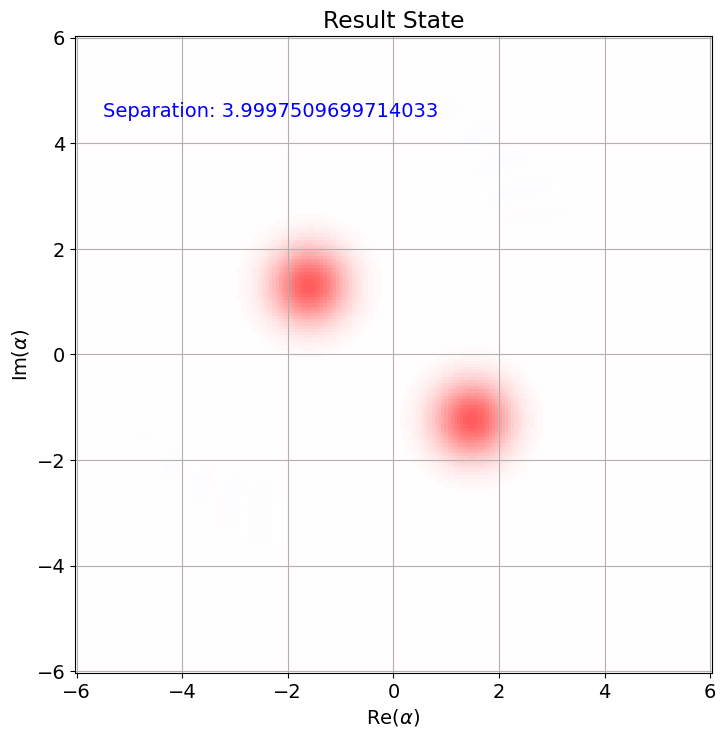

<Figure size 600x500 with 0 Axes>

In [17]:
# cnod = ket2dm(cnod)
fig = plt.figure(dpi=dpi)
axes = fig.subplots()
plt.title("Result State")

plot_wigner_home(cnod, npts=npts, ax=axes)

exp_g, exp_e = expect(e_ops[0], cnod), expect(e_ops[1], cnod)
print(exp_g, np.abs(exp_g))
print(exp_e, np.abs(exp_e))
separation = np.abs(exp_g) + np.abs(exp_e)
print("Separation:", separation)

"""Reminder: Target beta = 0.39269908169872414"""
axes.annotate("Separation: " + str(separation), xy=(-5.5, 4.5), c='b')

### Digital rotation

tetha degrees: -39.60000000000001


Text(0.5, 1.0, 'Rotated Final State')

<Figure size 3510x2481 with 0 Axes>

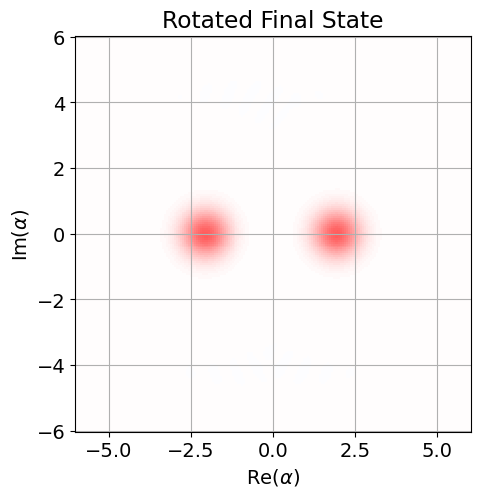

In [18]:
def rotate_mode(phi, rho):
    a = tensor(qeye(2), destroy(N))
    op = (-1j*phi*a.dag()*a).expm()
    if isket(rho):
        return op*(rho)
    return op*(rho)*op.dag()

plt.figure(dpi=dpi)
theta = - gate_time / 2 * chi
print("tetha degrees:", theta*180/np.pi)
rotated_final_state = rotate_mode(theta, cnod)
plot_wigner_home(rotated_final_state, npts=npts, max_alpha=max_alpha)
plt.title("Rotated Final State")

### Fidelity Calculation (Can Skip this part and pass directly to the protocol file)

In [20]:
if rotated_final_state.isket:
    result_state = rotated_final_state
else:
    print("USE KET")
    result_state = None

if 0: 
    # No relative phase or choose arbitrary angle (default theta = 0)
    theta_list = [0]  
if 1:  
    # The final state has a relative phase!
    theta_list = np.linspace(0, 360, 3) # Choose the range and number of angles to check fidelity for

theoretical_list, fidelity_list = [], []

for theta in theta_list:
    rad = theta * np.pi/180
    theoretical = (tensor( fock(2,0), coherent(N, alpha/2) ) - np.exp(1j*rad) * tensor(fock(2,1), coherent(N, -alpha/2))).unit()
    fid = fidelity(theoretical, result_state)
    theoretical_list.append(theoretical)
    fidelity_list.append(fid)

max_fidelity = np.max(np.array(fidelity_list))
max_fidelity_index = np.argmax(np.array(fidelity_list))
theta_degrees = theta_list[max_fidelity_index]
rad = theta_degrees * np.pi/180
theo = (tensor( fock(2,0), coherent(N, alpha/2) ) - np.exp(1j*rad) * tensor(fock(2,1), coherent(N, -alpha/2))).unit()

print("Theta degrees (max fid):", theta_degrees, "deg")
print("Max achieved fidelity:", max_fidelity*100, "%")

fig, axes = plt.subplots(1, 2) # Create a 2-plot figure

print("Shapes:", (theo).shape, result_state.shape)
print("Separation: ", separation)
print("Fidelity: ", max_fidelity*100, "%")

# Target state plot
plot_wigner_home(theo, npts=npts, max_alpha=max_alpha, ax=axes[0])  
axes[0].annotate(f"Target final separation = {alpha}", (-3.8,2.8), c='blue') 
axes[0].set_title("Target state")
      
# Result state plot
plot_wigner_home(result_state, npts=npts, max_alpha=max_alpha, ax=axes[1])
axes[1].set_title("Result state")
axes[1].annotate(f"Attained final separation ≈ {np.abs(round(-separation, 5))}", (-5.0,2.8), c='blue')
axes[1].annotate(f"Fidelity ≈ {round(max_fidelity*100,5)}%", (-5.0,2.1), c='blue')

Theta degrees (max fid): 0.0 deg
Max achieved fidelity: 93.31918542442756 %
